In [742]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [743]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [744]:
files =[file for file in os.listdir('resources')]
files

['FIFA - 1950.csv',
 'FIFA - 1978.csv',
 'FIFA - 1986.csv',
 'FIFA - World Cup Summary.csv',
 'FIFA - 1990.csv',
 'FIFA - 1994.csv',
 'FIFA - 1982.csv',
 'FIFA - 1954.csv',
 'FIFA - 2022.csv',
 'FIFA - 1930.csv',
 'FIFA - 2018.csv',
 'FIFA - 2002.csv',
 'FIFA - 2010.csv',
 'FIFA - 2006.csv',
 'FIFA - 1970.csv',
 'FIFA - 1966.csv',
 'FIFA - 1998.csv',
 'FIFA - 1962.csv',
 'FIFA - 1974.csv']

In [745]:
wc_summary=pd.read_csv('resources/FIFA - World Cup Summary.csv')
wc_summary

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4
5,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6
6,1962,Chile,Brazil,Czechoslovakia,Chile,16,32,89,2.8
7,1966,England,England,West Germany,Portugal,16,32,89,2.8
8,1970,Mexico,Brazil,Italy,West Germany,16,32,95,3.0
9,1974,West Germany,West Germany,Netherlands,Poland,16,38,97,2.6


In [746]:
#renaming West Germany to Germany

wc_summary.loc[wc_summary["HOST"]=="West Germany", "HOST"]="Germany"
wc_summary.loc[wc_summary["CHAMPION"]=="West Germany", "CHAMPION"]="Germany"
wc_summary.loc[wc_summary["RUNNER UP"]=="West Germany", "RUNNER UP"]="Germany"
wc_summary.loc[wc_summary["THIRD PLACE"]=="West Germany", "THIRD PLACE"]="Germany"

In [747]:
wc_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,Germany,Hungary,Austria,16,26,140,5.4


In [748]:
wc_summary.tail()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
17,2006,Germany,Italy,France,Germany,32,64,147,2.3
18,2010,South Africa,Spain,Netherlands,Germany,32,64,145,2.3
19,2014,Brazil,Germany,Argentina,Netherlands,32,64,171,2.7
20,2018,Russia,France,Croatia,Belgium,32,64,169,2.6
21,2022,Qatar,Argentina,France,Croatia,32,64,172,2.7


In [749]:
files =[file for file in os.listdir('resources')]
files

['FIFA - 1950.csv',
 'FIFA - 1978.csv',
 'FIFA - 1986.csv',
 'FIFA - World Cup Summary.csv',
 'FIFA - 1990.csv',
 'FIFA - 1994.csv',
 'FIFA - 1982.csv',
 'FIFA - 1954.csv',
 'FIFA - 2022.csv',
 'FIFA - 1930.csv',
 'FIFA - 2018.csv',
 'FIFA - 2002.csv',
 'FIFA - 2010.csv',
 'FIFA - 2006.csv',
 'FIFA - 1970.csv',
 'FIFA - 1966.csv',
 'FIFA - 1998.csv',
 'FIFA - 1962.csv',
 'FIFA - 1974.csv']

In [750]:
for file in files:
    print(f'resources/{file}') 

resources/FIFA - 1950.csv
resources/FIFA - 1978.csv
resources/FIFA - 1986.csv
resources/FIFA - World Cup Summary.csv
resources/FIFA - 1990.csv
resources/FIFA - 1994.csv
resources/FIFA - 1982.csv
resources/FIFA - 1954.csv
resources/FIFA - 2022.csv
resources/FIFA - 1930.csv
resources/FIFA - 2018.csv
resources/FIFA - 2002.csv
resources/FIFA - 2010.csv
resources/FIFA - 2006.csv
resources/FIFA - 1970.csv
resources/FIFA - 1966.csv
resources/FIFA - 1998.csv
resources/FIFA - 1962.csv
resources/FIFA - 1974.csv


In [751]:
print(os.listdir('resources')) 

['FIFA - 1950.csv', 'FIFA - 1978.csv', 'FIFA - 1986.csv', 'FIFA - World Cup Summary.csv', 'FIFA - 1990.csv', 'FIFA - 1994.csv', 'FIFA - 1982.csv', 'FIFA - 1954.csv', 'FIFA - 2022.csv', 'FIFA - 1930.csv', 'FIFA - 2018.csv', 'FIFA - 2002.csv', 'FIFA - 2010.csv', 'FIFA - 2006.csv', 'FIFA - 1970.csv', 'FIFA - 1966.csv', 'FIFA - 1998.csv', 'FIFA - 1962.csv', 'FIFA - 1974.csv']


In [752]:
wc_fifa = pd.DataFrame()
for file in files:
    if file != 'FIFA - World Cup Summary.csv':
        df_file = pd.read_csv(f'resources/{file}')
        wc_fifa = pd.concat([wc_fifa, df_file])
wc_fifa.head()

    

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,3,1,0,15,5,10,7
1,2,Brazil,6,4,1,1,22,6,16,9
2,3,Sweden,5,2,1,2,11,15,−4,5
3,4,Spain,6,3,1,2,10,12,−2,7
4,5,Yugoslavia,3,2,0,1,7,3,4,4


In [753]:
wc_fifa.shape

(410, 10)

In [754]:
wc_fifa.columns

Index(['Position', 'Team', 'Games Played', 'Win', 'Draw', 'Loss', 'Goals For',
       'Goals Against', 'Goal Difference', 'Points'],
      dtype='object')

In [755]:
wc_fifa.isnull().any()

Position           False
Team               False
Games Played       False
Win                False
Draw               False
Loss               False
Goals For          False
Goals Against      False
Goal Difference    False
Points             False
dtype: bool

In [756]:
wc_fifa.dtypes

Position            int64
Team               object
Games Played        int64
Win                 int64
Draw                int64
Loss                int64
Goals For           int64
Goals Against       int64
Goal Difference    object
Points              int64
dtype: object

In [757]:
#renaming West Germany to Germany
wc_fifa.loc[wc_fifa["Team"]=="West Germany", "Team"]="Germany"

In [758]:
wc_fifa.tail()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
11,12,Bulgaria,3,0,2,1,2,5,−3,2
12,13,Uruguay,3,0,1,2,1,6,−5,1
13,14,Australia,3,0,1,2,0,5,−5,1
14,15,Haiti,3,0,0,3,2,14,−12,0
15,16,Zaire,3,0,0,3,0,14,−14,0


In [759]:
wc_fifa.dtypes

Position            int64
Team               object
Games Played        int64
Win                 int64
Draw                int64
Loss                int64
Goals For           int64
Goals Against       int64
Goal Difference    object
Points              int64
dtype: object

In [760]:
wc_fifa

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,3,1,0,15,5,10,7
1,2,Brazil,6,4,1,1,22,6,16,9
2,3,Sweden,5,2,1,2,11,15,−4,5
3,4,Spain,6,3,1,2,10,12,−2,7
4,5,Yugoslavia,3,2,0,1,7,3,4,4
...,...,...,...,...,...,...,...,...,...,...
11,12,Bulgaria,3,0,2,1,2,5,−3,2
12,13,Uruguay,3,0,1,2,1,6,−5,1
13,14,Australia,3,0,1,2,0,5,−5,1
14,15,Haiti,3,0,0,3,2,14,−12,0


In [761]:
wc_fifa

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Uruguay,4,3,1,0,15,5,10,7
1,2,Brazil,6,4,1,1,22,6,16,9
2,3,Sweden,5,2,1,2,11,15,−4,5
3,4,Spain,6,3,1,2,10,12,−2,7
4,5,Yugoslavia,3,2,0,1,7,3,4,4
...,...,...,...,...,...,...,...,...,...,...
11,12,Bulgaria,3,0,2,1,2,5,−3,2
12,13,Uruguay,3,0,1,2,1,6,−5,1
13,14,Australia,3,0,1,2,0,5,−5,1
14,15,Haiti,3,0,0,3,2,14,−12,0


In [762]:
print(wc_fifa.columns)

Index(['Position', 'Team', 'Games Played', 'Win', 'Draw', 'Loss', 'Goals For',
       'Goals Against', 'Goal Difference', 'Points'],
      dtype='object')


In [763]:
# Set 'Team' as the index
wc_fifas = wc_fifa.set_index(['Team'])



In [764]:
wc_fifas 

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Team,,,,,,,,,
Uruguay,1,4,3,1,0,15,5,10,7
Brazil,2,6,4,1,1,22,6,16,9
Sweden,3,5,2,1,2,11,15,−4,5
Spain,4,6,3,1,2,10,12,−2,7
Yugoslavia,5,3,2,0,1,7,3,4,4
...,...,...,...,...,...,...,...,...,...
Bulgaria,12,3,0,2,1,2,5,−3,2
Uruguay,13,3,0,1,2,1,6,−5,1
Australia,14,3,0,1,2,0,5,−5,1


In [765]:
wc_fifas

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Team,,,,,,,,,
Uruguay,1,4,3,1,0,15,5,10,7
Brazil,2,6,4,1,1,22,6,16,9
Sweden,3,5,2,1,2,11,15,−4,5
Spain,4,6,3,1,2,10,12,−2,7
Yugoslavia,5,3,2,0,1,7,3,4,4
...,...,...,...,...,...,...,...,...,...
Bulgaria,12,3,0,2,1,2,5,−3,2
Uruguay,13,3,0,1,2,1,6,−5,1
Australia,14,3,0,1,2,0,5,−5,1


In [766]:
wc_fifas.drop_duplicates().any()

Position           True
Games Played       True
Win                True
Draw               True
Loss               True
Goals For          True
Goals Against      True
Goal Difference    True
Points             True
dtype: bool

In [767]:
wc_fifa.dtypes

Position            int64
Team               object
Games Played        int64
Win                 int64
Draw                int64
Loss                int64
Goals For           int64
Goals Against       int64
Goal Difference    object
Points              int64
dtype: object

In [768]:
print(wc_fifas[['Position', 'Games Played', 'Win', 'Draw', 'Loss', 'Goals For', 'Goals Against', 'Goal Difference', 'Points']].dtypes)


Position            int64
Games Played        int64
Win                 int64
Draw                int64
Loss                int64
Goals For           int64
Goals Against       int64
Goal Difference    object
Points              int64
dtype: object


In [769]:
#Goal Difference is object, we need to clean up 

columns_to_convert = ['Position', 'Games Played', 'Win', 'Draw', 'Loss', 
                      'Goals For', 'Goals Against', 'Goal Difference', 'Points']

# Apply conversion
wc_fifas[columns_to_convert] = wc_fifas[columns_to_convert].apply(
    lambda x: pd.to_numeric(x, errors='coerce')
)


In [770]:
print(wc_fifas[columns_to_convert].isna().sum())


Position             0
Games Played         0
Win                  0
Draw                 0
Loss                 0
Goals For            0
Goals Against        0
Goal Difference    188
Points               0
dtype: int64


In [771]:
#dropping rows with missing values
wc_fifas = wc_fifas.dropna(subset = columns_to_convert)

In [772]:
print(wc_fifas['Goal Difference'].unique())


[10. 16.  4.  1.  0. 11.  5.  7.  3.  9.  6.  8.  2. 17. -2. -4. -1. -3.
 -8. -5. -6. 12. 14. 13.]


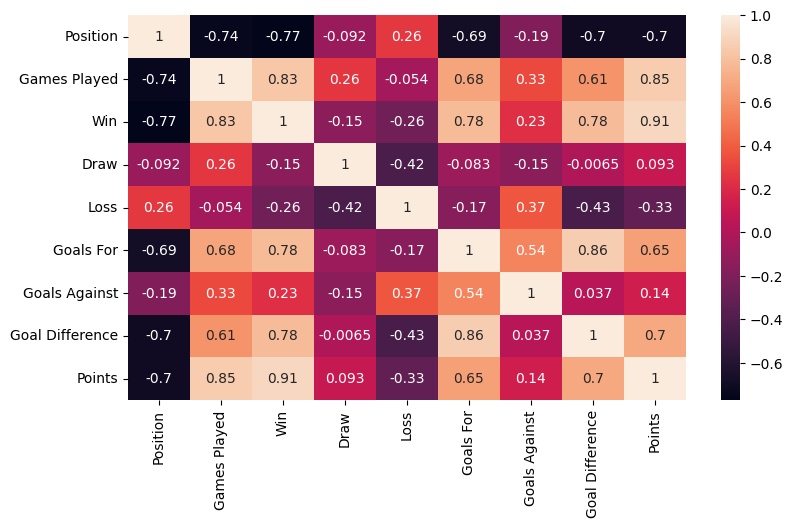

In [773]:
plt.figure(figsize=(9,5))
sns.heatmap(wc_fifas[columns_to_convert].corr(), color='k', annot=True)
plt.show()

In [774]:
#calaculating win rate
wc_fifas["Win Rate"] = wc_fifas["Win"]/wc_fifas["Games Played"]* 100

/var/folders/33/s1v3z17x5vs0mgg845k9r16r0000gp/T/ipykernel_10082/3030977721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_fifas["Win Rate"] = wc_fifas["Win"]/wc_fifas["Games Played"]* 100


In [775]:
wc_fifas.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Win Rate
Team,,,,,,,,,,
Uruguay,1,4,3,1,0,15,5,10.0,7,75.000000
Brazil,2,6,4,1,1,22,6,16.0,9,66.666667
Yugoslavia,5,3,2,0,1,7,3,4.0,4,66.666667
Italy,7,2,1,0,1,4,3,1.0,2,50.000000
England,8,3,1,0,2,2,2,0.0,2,33.333333


In [776]:
# sorting with Games played and win
wc_fifas_teams = wc_fifas.sort_values(['Games Played', 'Win'], ascending = False)
wc_fifas_teams

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Win Rate
Team,,,,,,,,,,
Brazil,1,7,7,0,0,18,4,14.0,21,100.000000
Argentina,1,7,6,1,0,14,5,9.0,13,85.714286
Italy,3,7,6,1,0,10,2,8.0,13,85.714286
Argentina,1,7,6,0,1,15,8,7.0,18,85.714286
France,1,7,6,1,0,14,6,8.0,19,85.714286
...,...,...,...,...,...,...,...,...,...,...
New Zealand,22,3,0,3,0,2,2,0.0,3,0.000000
Belgium,19,3,0,3,0,3,3,0.0,3,0.000000
Italy,7,2,1,0,1,4,3,1.0,2,50.000000


In [777]:
wc_summary_gamesplayed=  wc_fifas.value_counts(['Team','Games Played'])
wc_summary_gamesplayed


Team         Games Played
Germany      7               7
France       7               6
Brazil       5               6
             7               5
Mexico       4               5
                            ..
Italy        6               1
             5               1
             4               1
             2               1
Netherlands  4               1
Name: count, Length: 131, dtype: int64

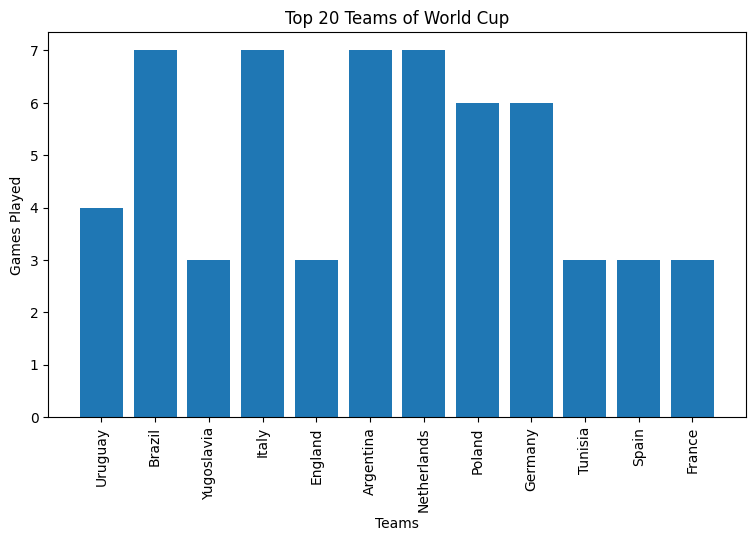

In [778]:
# Extract Teams and align with the DataFrame values
Teams = wc_fifas.index[:15]  # Top 20 teams (adjust as needed)
games_played = wc_fifas['Games Played'][:15]  # Corresponding 'Games Played' values

# Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(Teams, games_played)  # Ensure Teams and games_played match

# Set x-ticks with rotation
plt.xticks(rotation='vertical', size=10)

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Games Played')
plt.title('Top 20 Teams of World Cup')

# Display the plot
plt.show()


In [779]:
wc__gameswin = wc_fifas.value_counts(['Team', 'Win'])
wc__gameswin


Team           Win
Germany        5      6
Brazil         4      6
England        3      5
Brazil         3      5
Italy          1      5
                     ..
France         5      1
               3      1
FR Yugoslavia  2      1
England        5      1
Italy          6      1
Name: count, Length: 129, dtype: int64

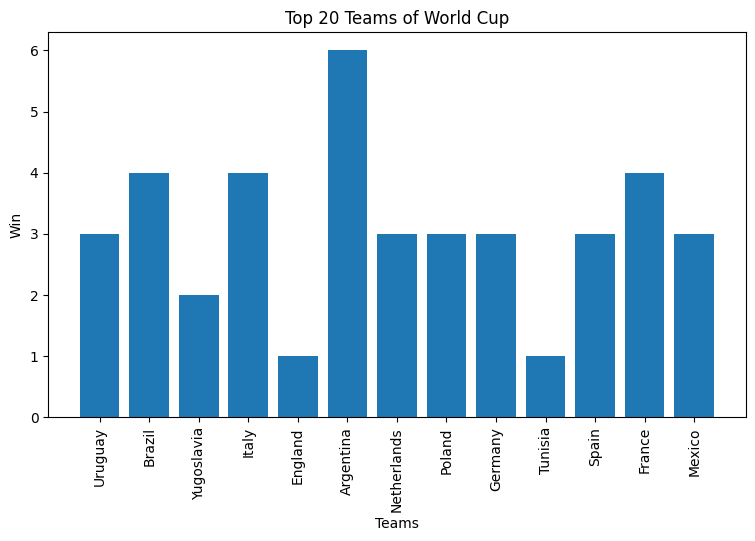

In [780]:
# Extract Teams and align with the DataFrame values
Teams = wc_fifas.index[:20]  # Top 20 teams (adjust as needed)
games_win = wc_fifas['Win'][:20]  # Corresponding 'Games Played' values

# Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(Teams, games_win)  # Ensure Teams and games_played match

# Set x-ticks with rotation
plt.xticks(rotation='vertical', size=10)

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Win')
plt.title('Top 20 Teams of World Cup')

# Display the plot
plt.show()

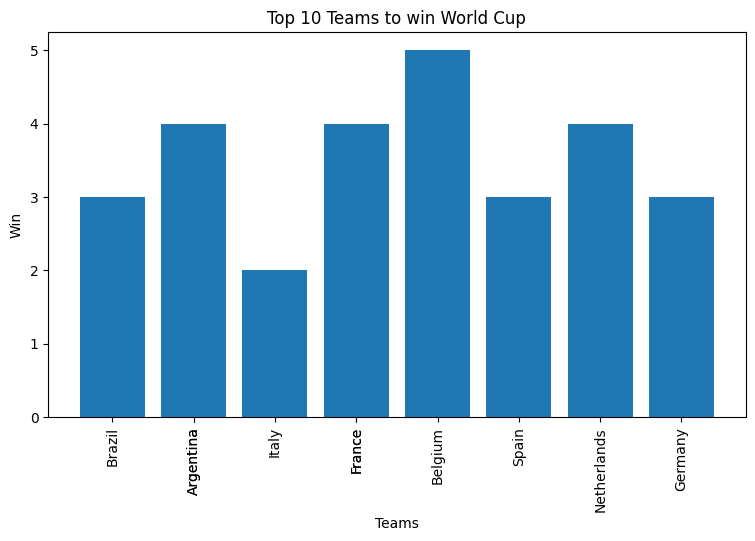

In [781]:
# Extract Teams as list from the DataFrame index
Teams = [team for team in wc_fifas_teams.index]

# Plot the bar chart
plt.figure(figsize=(9, 5))
plt.bar(Teams[:10], wc_fifas['Win'][:10])  # Adjusted to 10 teams

# Set x-ticks with rotation
plt.xticks(Teams[:10],rotation='vertical', size=10)

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Win')
plt.title('Top 10 Teams to win World Cup')

# Display the plot
plt.show()

In [782]:
wc_summary_champion= wc_summary.value_counts(['CHAMPION'])
wc_summary_champion

CHAMPION 
Brazil       5
Germany      4
Italy        4
Argentina    3
France       2
Uruguay      2
England      1
Spain        1
Name: count, dtype: int64

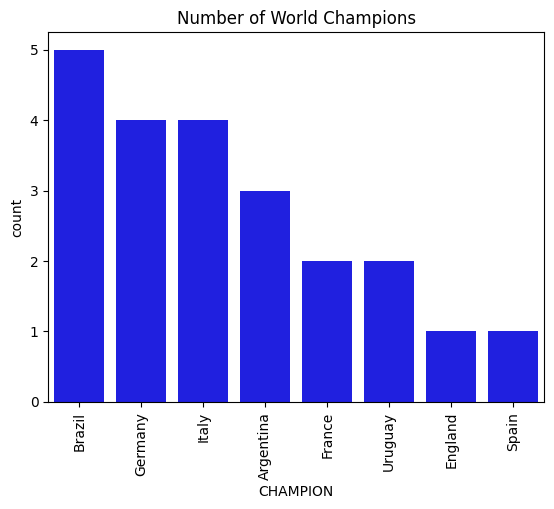

In [783]:
champion_order = wc_summary_champion.index.get_level_values(0).tolist()


sns.countplot(
    data=wc_summary,
    x='CHAMPION',
    order=champion_order,  # Flattened list of values
    color='b'
)
plt.title('Number of World Champions')  # Corrected typo in plt.titles
plt.xticks(rotation=90, size=10)
plt.show()



In [784]:
wc_summary_host= wc_summary.value_counts(['HOST'])
wc_summary_host

HOST              
France                2
Germany               2
Italy                 2
Mexico                2
Brazil                2
Argentina             1
South Korea, Japan    1
United States         1
Switzerland           1
Sweden                1
Spain                 1
Qatar                 1
South Africa          1
Russia                1
England               1
Chile                 1
Uruguay               1
Name: count, dtype: int64

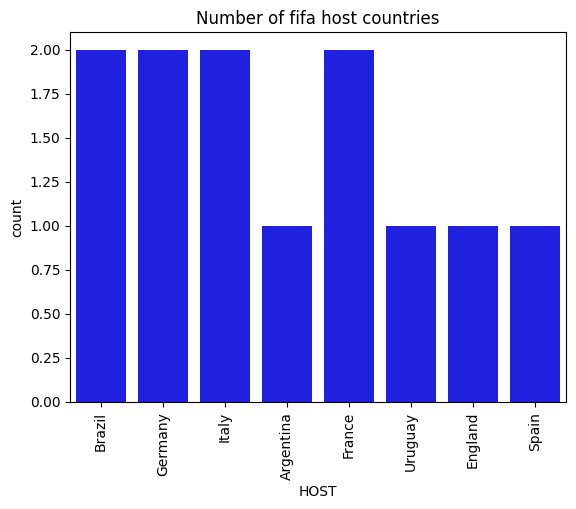

In [785]:
host_order = wc_summary_host.index.get_level_values(0).tolist()


sns.countplot(
    data=wc_summary,
    x='HOST',
    order=champion_order,  # Flattened list of values
    color='b'
)
plt.title('Number of fifa host countries')  # Corrected typo in plt.titles
plt.xticks(rotation=90, size=10)
plt.show()

In [786]:
wc_fifas.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Win Rate
Team,,,,,,,,,,
Uruguay,1,4,3,1,0,15,5,10.0,7,75.000000
Brazil,2,6,4,1,1,22,6,16.0,9,66.666667
Yugoslavia,5,3,2,0,1,7,3,4.0,4,66.666667
Italy,7,2,1,0,1,4,3,1.0,2,50.000000
England,8,3,1,0,2,2,2,0.0,2,33.333333


<function matplotlib.pyplot.show(close=None, block=None)>

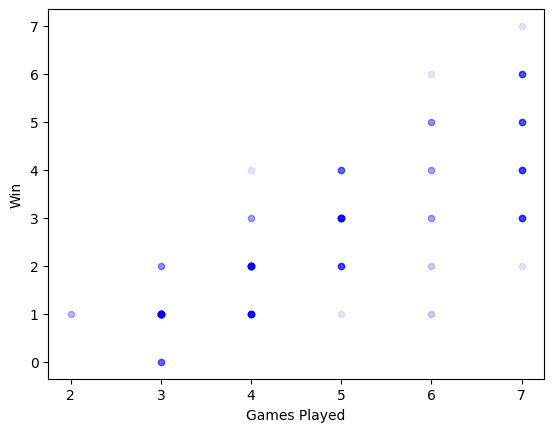

In [787]:
wc_fifas.plot(kind='scatter', x='Games Played', y='Win', alpha=0.1, color='blue')
plt.show

In [788]:
wc_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,Germany,Hungary,Austria,16,26,140,5.4


<function matplotlib.pyplot.show(close=None, block=None)>

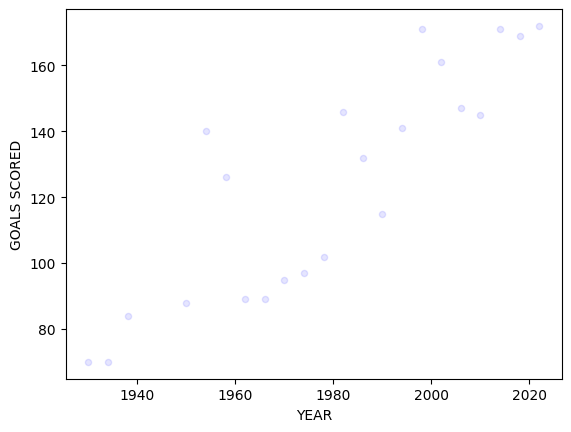

In [789]:
wc_summary.plot(kind='scatter', x='YEAR', y='GOALS SCORED', alpha=0.1, color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

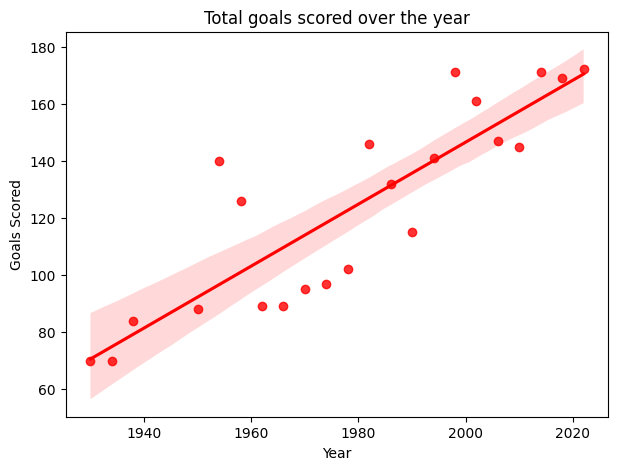

In [790]:
plt.figure(figsize=(7,5))
sns.regplot(x=wc_summary['YEAR'], y=wc_summary['GOALS SCORED'], color = 'red')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.title('Total goals scored over the year')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

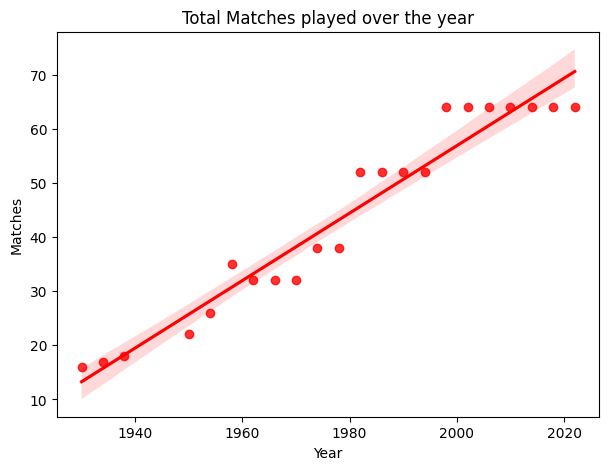

In [791]:
plt.figure(figsize=(7,5))
sns.regplot(x=wc_summary['YEAR'], y=wc_summary['MATCHES PLAYED'], color = 'red')
plt.xlabel('Year')
plt.ylabel('Matches')
plt.title('Total Matches played over the year')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

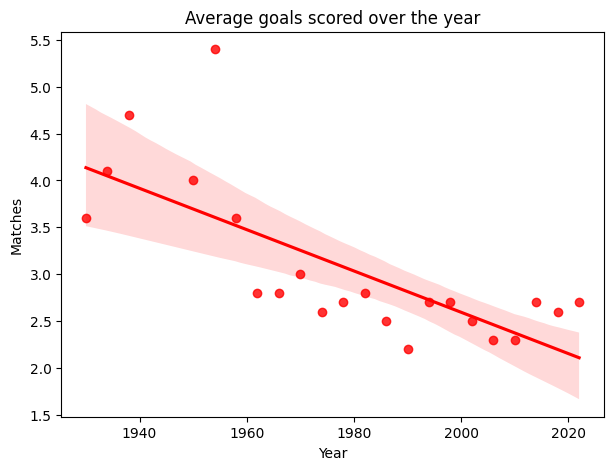

In [792]:
plt.figure(figsize=(7,5))
sns.regplot(x=wc_summary['YEAR'], y=wc_summary['AVG GOALS PER GAME'], color = 'red')
plt.xlabel('Year')
plt.ylabel('Matches')
plt.title('Average goals scored over the year')
plt.show

In [793]:
wc_fifas.head()

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Win Rate
Team,,,,,,,,,,
Uruguay,1,4,3,1,0,15,5,10.0,7,75.000000
Brazil,2,6,4,1,1,22,6,16.0,9,66.666667
Yugoslavia,5,3,2,0,1,7,3,4.0,4,66.666667
Italy,7,2,1,0,1,4,3,1.0,2,50.000000
England,8,3,1,0,2,2,2,0.0,2,33.333333


In [794]:
wc_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,Germany,Hungary,Austria,16,26,140,5.4


## Machine Learning model using sckit learn, I am using wc_summary and it is a supervised learning, Using Linear regression ML model to predict "Goals Scored"

In [795]:
X.dtypes

YEAR                    int64
TEAMS                   int64
MATCHES PLAYED          int64
AVG GOALS PER GAME    float64
dtype: object

In [796]:
print(wc_summary['TEAMS'].unique())
print(wc_summary['MATCHES PLAYED'].unique())


[13 16 15 24 32]
[16 17 18 22 26 35 32 38 52 64]


In [797]:
wc_summary['TEAMS'] = pd.to_numeric(wc_summary['TEAMS'], errors='coerce')
wc_summary['MATCHES PLAYED'] = pd.to_numeric(wc_summary['MATCHES PLAYED'], errors='coerce')


In [798]:
wc_summary = wc_summary.dropna(subset=['TEAMS', 'MATCHES PLAYED', 'GOALS SCORED'])


In [799]:

# Features and target
X = wc_summary.drop(columns=['GOALS SCORED'])
y = wc_summary['GOALS SCORED']

In [800]:
# Ensure numeric columns only (handle non-numeric columns)
X = X.select_dtypes(include=['number'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

#scoring the model on test dataset
y_pred=model.predict(X_test)

# Evaluate
print("R2 Score:", model.score(X_test, y_test))
print("The mean squared error:",mean_squared_error(y_test,y_pred))


R2 Score: 0.8906726674301781
The mean squared error: 153.11948890398975


In [801]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-Validated R2 Scores:", scores)
print("Mean Cross-Validated R2 Score:", scores.mean())


Cross-Validated R2 Scores: [-0.40207999  0.87951489  0.85161841  0.83366481 -0.68801259]
Mean Cross-Validated R2 Score: 0.29494110662786366


##The large difference between best and worst R2 scores suggest that the model performance is inconsistent. This means that data hasn't been evenly distriibuted, There has been overfitting to some folds and it looks like thers is presence of outliers or noise.


In [802]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


              Feature  Coefficient
3  AVG GOALS PER GAME    32.826521
2      MATCHES PLAYED     4.176062
0                YEAR     0.152504
1               TEAMS    -3.367309


#The table provides a coefficient from the regression model, indicating the relationship between the each feature and target variables.

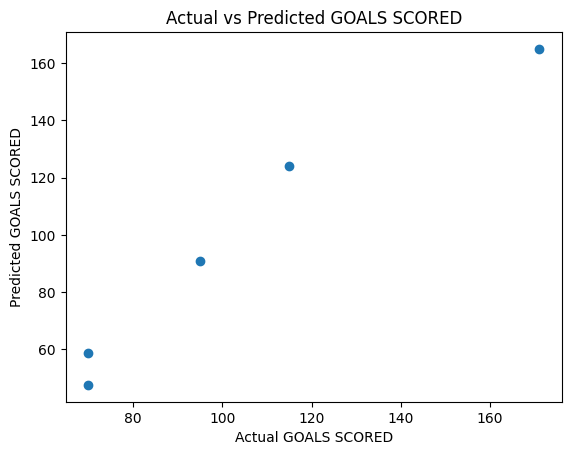

In [803]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GOALS SCORED")
plt.ylabel("Predicted GOALS SCORED")
plt.title("Actual vs Predicted GOALS SCORED")
plt.show()
